### Week 5/6



In [24]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, Policy, Scenario)

from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

from ema_workbench import (Model, )

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time

from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [25]:
uncertainties = dike_model.uncertainties
levers = dike_model.levers 

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

[MainProcess/INFO] generation 0: 0/200 nfe
[MainProcess/INFO] optimization completed, found 6 solutions


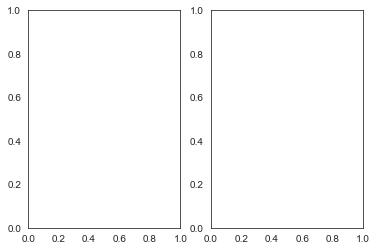

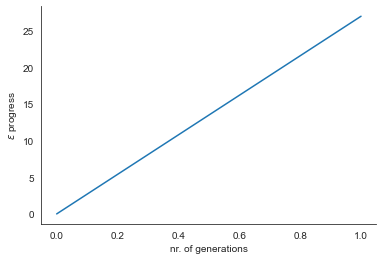

In [28]:
from __future__ import (unicode_literals, print_function, absolute_import,
                        division)


from ema_workbench import (Model, MultiprocessingEvaluator,
                           ScalarOutcome, IntegerParameter, optimize, Scenario)
from ema_workbench.em_framework.optimization import EpsilonProgress
from ema_workbench.util import ema_logging

from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import seaborn as sns


if __name__ == '__main__':
    ema_logging.log_to_stderr(ema_logging.INFO)

    model, steps = get_model_for_problem_formulation(2)

    reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'discount rate 0': 3.5, 'discount rate 1': 3.5,
                        'discount rate 2': 3.5,
                        'ID flood wave shape': 4}
    scen1 = {}

    for key in model.uncertainties:
        name_split = key.name.split('_')

        if len(name_split) == 1:
            scen1.update({key.name: reference_values[key.name]})

        else:
            scen1.update({key.name: reference_values[name_split[1]]})

    ref_scenario = Scenario('reference', **scen1)

    convergence_metrics = [EpsilonProgress()]

    espilon = [1e3] * len(model.outcomes)

    nfe = 200 # proof of principle only, way to low for actual use

    with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                                  epsilons=espilon,
                                                  convergence=convergence_metrics,
                                                  reference=ref_scenario)

    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)
    fig, ax1 = plt.subplots(ncols=1)
    ax1.plot(convergence.epsilon_progress)
    ax1.set_xlabel('nr. of generations')
    ax1.set_ylabel('$\epsilon$ progress')
    sns.despine()

In [13]:
pd.set_option('display.max_columns', None)

results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,8,2,0,1,0,3,4,1,3,5,5,2,1,8,7,3.220888e+07,4.603915e+08,9.067000e+08,1174.581654,0.013092
1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,4,0,5,9,0,2,8,3,4,5,0,3,7,2,7,0,1.469963e+07,4.734877e+08,4.619000e+08,1134.689346,0.002061
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,10,7,3,8,0,9,7,0,3,10,10,10,6,8,1.334644e+05,7.143615e+08,3.270000e+08,0.000000,0.000161
3,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,3,2,2,1,8,1,3,0,0,5,1,6,3,5,7,2.199814e+06,4.884999e+08,5.233000e+08,0.000000,0.002588
4,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,4,3,2,6,0,2,5,0,8,2,3,0,7,2,7,1,3.296031e+07,4.609190e+08,6.334000e+08,2303.906367,0.006807
5,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,3,6,1,5,3,5,0,1,1,6,4,4,4,2,10,5,0.000000e+00,5.355853e+08,8.623000e+08,0.000000,0.000000
6,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,3,2,3,5,0,1,1,0,7,3,5,0,6,4,5,0,8.789160e+06,3.902530e+08,9.349000e+08,574.054891,0.001323
7,0,0,0,1,0,1,0,1,1,1,0,1,0,1,1,2,2,2,2,4,0,2,2,0,6,10,0,0,0,7,9,7.003513e+06,4.095756e+08,1.251600e+09,436.366374,0.001166
8,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,3,4,5,5,3,5,6,1,7,4,8,6,9,6,1,5,0.000000e+00,6.517416e+08,3.884000e+08,0.000000,0.000000
9,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,7,1,1,7,1,7,3,4,8,5,6,5,5,3,6,0.000000e+00,6.377319e+08,6.258000e+08,0.000000,0.000000


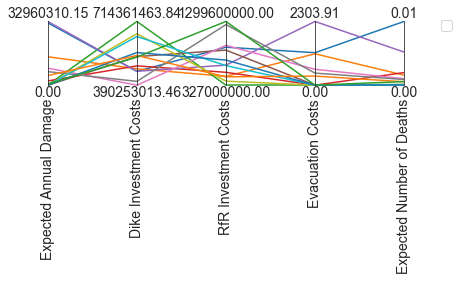

In [23]:
from ema_workbench.analysis import parcoords

colors = iter(sns.color_palette())

data = results.iloc[:, -5::] #
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)

paraxes.legend()
plt.show()

In [11]:
from ema_workbench.analysis import parcoords

data = results.loc[:, ['A.5_Expected Number of Deaths 2', 'A.4_Expected Number of Deaths 2','A.5_Dike Investment Costs 2', 'RfR Total Costs 2', 'Expected Evacuation Costs 2']]
limits = parcoords.get_limits(data)
limits.loc[0, ['A.5_Expected Number of Deaths 2', 'A.4_Expected Number of Deaths 2','A.5_Dike Investment Costs 2', 'RfR Total Costs 2', 'Expected Evacuation Costs 2']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
#paraxes.invert_axis('max_P')
plt.show()

KeyError: "None of [Index(['A.5_Expected Number of Deaths 2', 'A.4_Expected Number of Deaths 2',\n       'A.5_Dike Investment Costs 2', 'RfR Total Costs 2',\n       'Expected Evacuation Costs 2'],\n      dtype='object')] are in the [columns]"